## 1-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

In [60]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [61]:
from PIL import Image
import glob

In [62]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28X28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/sample_data/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

400  images to be resized.
400  images resized.
가위 이미지 resize 완료!


In [63]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = "/content/sample_data/rock_scissor_paper/rock"

# 파일마다 모두 28X28 사이즈로 바꾸어 저장합니다.

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

400  images to be resized.
400  images resized.
바위 이미지 resize 완료!


In [64]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = "/content/sample_data/rock_scissor_paper/paper"

# 파일마다 모두 28X28 사이즈로 바꾸어 저장합니다.

resize_images(image_dir_path)

print("보 이미지 resize 완료!")

400  images to be resized.
400  images resized.
보 이미지 resize 완료!


In [65]:
import numpy as np

def load_data(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/sample_data/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


라벨:  0


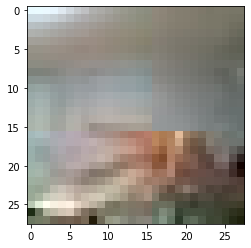

In [66]:
plt.imshow(x_train[0])             # 데이터 확인
print('라벨: ', y_train[0])

In [67]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [68]:
# model 학습
# Hint! model.compile()과 model.fit()을 사용

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15)

Epoch 1/15
38/38 [==============================] - 1s 22ms/step - loss: 3.8737 - accuracy: 0.5383
Epoch 2/15
38/38 [==============================] - 1s 22ms/step - loss: 0.4936 - accuracy: 0.7825
Epoch 3/15
38/38 [==============================] - 1s 21ms/step - loss: 0.2275 - accuracy: 0.9283
Epoch 4/15
38/38 [==============================] - 1s 21ms/step - loss: 0.1268 - accuracy: 0.9600
Epoch 5/15
38/38 [==============================] - 1s 21ms/step - loss: 0.0741 - accuracy: 0.9825
Epoch 6/15
38/38 [==============================] - 1s 21ms/step - loss: 0.0361 - accuracy: 0.9950
Epoch 7/15
38/38 [==============================] - 1s 21ms/step - loss: 0.0182 - accuracy: 0.9983
Epoch 8/15
38/38 [==============================] - 1s 21ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 9/15
38/38 [==============================] - 1s 20ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 10/15
38/38 [==============================] - 1s 21ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 11/

In [69]:
# x_test, y_test 데이터 만들기

image_dir_path = "/content/sample_data/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = "/content/sample_data/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = "/content/sample_data/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/sample_data/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [70]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 6.1072 - accuracy: 0.4667 - 205ms/epoch - 20ms/step
test_loss: 6.107244491577148 
test_accuracy: 0.46666666865348816


### 후기
훈련 데이터 개수를 1200개로 늘려 정확도 약 10% 정도 높아짐.<br>
이미지 크기나 epoch 횟수 조절로인한 정확도 변화는 무작위로 오르내림.
